# Taylor Swift's Lyrics

## Objetivos

- Objetivo 1;

- Objetivo 2;

- Objetivo 3.

## 1. Pré-processamento de dados

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df

,Unnamed: 0.1,Unnamed: 0,class,lyric
0,0,0,0,"Look at her face, it's a wonderful face \r\nA..."
1,1,1,0,"Take it easy with me, please \r\nTouch me gen..."
2,2,2,0,I'll never know why I had to go \r\nWhy I had...
3,3,3,0,Making somebody happy is a question of give an...
4,4,4,0,Making somebody happy is a question of give an...
...,...,...,...,...
57796,57796,227,1,"By all accounts, she almost drowned When she w..."
57797,57797,228,1,"Long may you reign You're an animal, you are b..."
57798,57798,229,1,Now and then she rereads the manuscript Of the...
57799,57799,230,1,"Oh, Carolina creeks running through my veins L..."


In [4]:
df = (
    pd.concat([
        df.tail(232),  # Últimos 300 elementos
        df.head(-232).sample(n=768, random_state=42)  # 4700 aleatórios do resto
    ])
    .reset_index(drop=True)
)
df

,Unnamed: 0.1,Unnamed: 0,class,lyric
0,57569,0,1,He said the way my blue eyes shined Put those ...
1,57570,1,1,"State the obvious, I didn't get my perfect fan..."
2,57571,2,1,Drew looks at me I fake a smile so he won't se...
3,57572,3,1,"I don't know what I want, so don't ask me 'Cau..."
4,57573,4,1,You have a way of coming easily to me And when...
...,...,...,...,...
995,53293,53293,0,Ain't no sunshine when she's gone \r\nIt's no...
996,5512,5512,0,I could be anywhere else but here \r\nBut the...
997,26247,26247,0,"Traveling at night, the headlights were bright..."
998,23685,23685,0,"Crossroads, seem to come and go, yeah. \r\nTh..."


In [5]:
df = df.drop(columns = {'Unnamed: 0.1', 'Unnamed: 0'})
df

,class,lyric
0,1,He said the way my blue eyes shined Put those ...
1,1,"State the obvious, I didn't get my perfect fan..."
2,1,Drew looks at me I fake a smile so he won't se...
3,1,"I don't know what I want, so don't ask me 'Cau..."
4,1,You have a way of coming easily to me And when...
...,...,...
995,0,Ain't no sunshine when she's gone \r\nIt's no...
996,0,I could be anywhere else but here \r\nBut the...
997,0,"Traveling at night, the headlights were bright..."
998,0,"Crossroads, seem to come and go, yeah. \r\nTh..."


In [6]:
import re

In [7]:
word_regex = r'[^a-zA-Z]'
break_regex = r'[\r\n]'

df['lyric'] = (
    df['lyric']
    .apply(lambda x: re.sub(word_regex, ' ', x))
    .apply(lambda x: re.sub(break_regex, ' ', x))
)

In [8]:
df

,class,lyric
0,1,He said the way my blue eyes shined Put those ...
1,1,State the obvious I didn t get my perfect fan...
2,1,Drew looks at me I fake a smile so he won t se...
3,1,I don t know what I want so don t ask me Cau...
4,1,You have a way of coming easily to me And when...
...,...,...
995,0,Ain t no sunshine when she s gone It s not ...
996,0,I could be anywhere else but here But the r...
997,0,Traveling at night the headlights were bright...
998,0,Crossroads seem to come and go yeah The ...


In [9]:
df['lyric'] = df['lyric'].apply(lambda x: x.lower())
df

,class,lyric
0,1,he said the way my blue eyes shined put those ...
1,1,state the obvious i didn t get my perfect fan...
2,1,drew looks at me i fake a smile so he won t se...
3,1,i don t know what i want so don t ask me cau...
4,1,you have a way of coming easily to me and when...
...,...,...
995,0,ain t no sunshine when she s gone it s not ...
996,0,i could be anywhere else but here but the r...
997,0,traveling at night the headlights were bright...
998,0,crossroads seem to come and go yeah the ...


In [10]:
import spacy

In [11]:
nlp = spacy.load("en_core_web_sm")

In [12]:
tokens_list = []
for lyric in df['lyric']:
    doc = nlp(lyric)
    tokens = [token.lemma_ for token in doc 
              if not token.is_stop and not token.is_punct]
    tokens_list.append(tokens)

df['tokens'] = tokens_list

In [13]:
df

,class,lyric,tokens
0,1,he said the way my blue eyes shined put those ...,"[say, way, blue, eye, shine, georgia, star, sh..."
1,1,state the obvious i didn t get my perfect fan...,"[state, obvious, , didn, t, perfect, fantasy,..."
2,1,drew looks at me i fake a smile so he won t se...,"[draw, look, fake, smile, win, t, want, m, nee..."
3,1,i don t know what i want so don t ask me cau...,"[don, t, know, want, , don, t, ask, , cause,..."
4,1,you have a way of coming easily to me and when...,"[way, come, easily, , good, start, fight, , ..."
...,...,...,...
995,0,ain t no sunshine when she s gone it s not ...,"[ain, t, sunshine, s, go, , s, warm, s, awa..."
996,0,i could be anywhere else but here but the r...,"[ , rain, win, t, let, , s, photograph, ..."
997,0,traveling at night the headlights were bright...,"[travel, night, , headlight, bright, , d, ..."
998,0,crossroads seem to come and go yeah the ...,"[crossroad, , come, , yeah, , gypsy, fly..."


In [14]:
df['lyricsProcessed'] = df['tokens'].apply(lambda x: ' '.join(x))

In [15]:
df

,class,lyric,tokens,lyricsProcessed
0,1,he said the way my blue eyes shined put those ...,"[say, way, blue, eye, shine, georgia, star, sh...",say way blue eye shine georgia star shame nigh...
1,1,state the obvious i didn t get my perfect fan...,"[state, obvious, , didn, t, perfect, fantasy,...",state obvious didn t perfect fantasy realize...
2,1,drew looks at me i fake a smile so he won t se...,"[draw, look, fake, smile, win, t, want, m, nee...",draw look fake smile win t want m need ll bet ...
3,1,i don t know what i want so don t ask me cau...,"[don, t, know, want, , don, t, ask, , cause,...",don t know want don t ask cause m try figu...
4,1,you have a way of coming easily to me and when...,"[way, come, easily, , good, start, fight, , ...",way come easily good start fight cause nee...
...,...,...,...,...
995,0,ain t no sunshine when she s gone it s not ...,"[ain, t, sunshine, s, go, , s, warm, s, awa...",ain t sunshine s go s warm s away ain ...
996,0,i could be anywhere else but here but the r...,"[ , rain, win, t, let, , s, photograph, ...",rain win t let s photograph hang ...
997,0,traveling at night the headlights were bright...,"[travel, night, , headlight, bright, , d, ...",travel night headlight bright d hour ...
998,0,crossroads seem to come and go yeah the ...,"[crossroad, , come, , yeah, , gypsy, fly...",crossroad come yeah gypsy fly coast c...


## 2. Análise exploratória

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [17]:
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(df['lyricsProcessed'])

In [18]:
import plotly.express as px

In [19]:
bow_df = pd.DataFrame(X_bow.toarray(), columns = bow_vectorizer.get_feature_names_out())

In [20]:
word_freq = bow_df.sum().sort_values(ascending=False)

word_freq_df = word_freq.reset_index()
word_freq_df.columns = ['word', 'freq']

bar_word_freq = px.bar(
    word_freq_df.head(20),  # Mostrar apenas top 20 para melhor visualização
    x='word',
    y='freq',
    title='Top 20 Most Relevant Words',
    labels={'word': 'Word', 'freq': 'Frequency'}
)

bar_word_freq.show()


In [21]:
labels = df['class']

In [22]:
bow_df['category'] = labels

not_bow = bow_df[bow_df['category'] == 0].drop('category', axis=1)
yes_bow = bow_df[bow_df['category'] == 1].drop('category', axis=1)

In [23]:
top_not_words = not_bow.sum().sort_values(ascending = False).head(20)
top_yes_words = yes_bow.sum().sort_values(ascending = False).head(20)

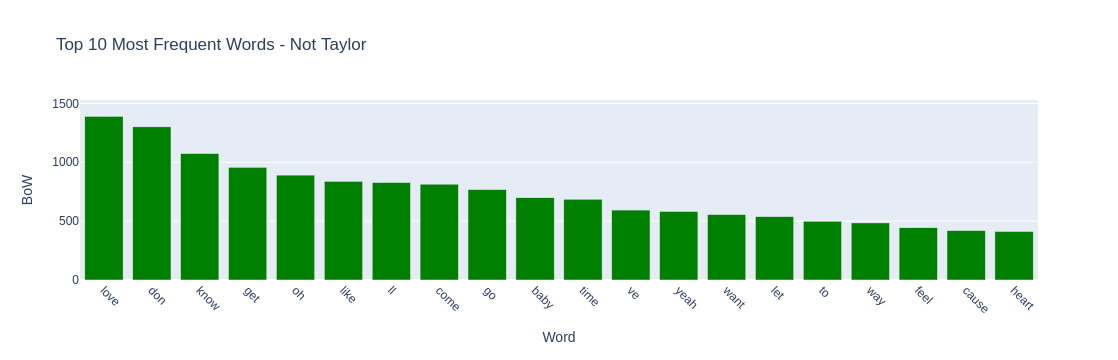

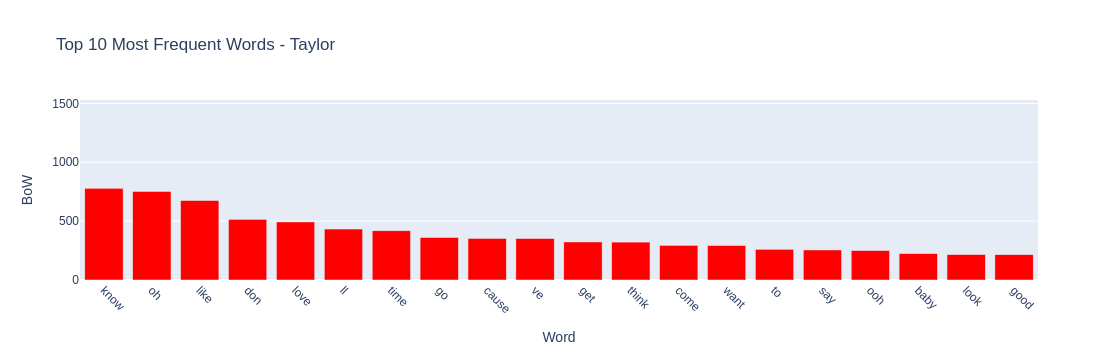

In [24]:
max_value = max(top_not_words.max(), top_yes_words.max()) * 1.10

fig_ham = px.bar(
    x = top_not_words.index,
    y = top_not_words.values,
    title = 'Top 10 Most Frequent Words - Not Taylor',
    labels = {'x': 'Word', 'y': 'BoW'},
    color_discrete_sequence = ['green']
)

fig_ham.update_layout(
    xaxis_tickangle = 45,
    yaxis_range = [0, max_value]
)

fig_spam = px.bar(
    x = top_yes_words.index,
    y = top_yes_words.values,
    title = 'Top 10 Most Frequent Words - Taylor',
    labels = {'x': 'Word', 'y': 'BoW'},
    color_discrete_sequence = ['red']
)

fig_spam.update_layout(
    xaxis_tickangle = 45,
    yaxis_range = [0, max_value]
)

fig_ham.show()
fig_spam.show()

In [25]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['lyricsProcessed'])

In [26]:
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns = bow_vectorizer.get_feature_names_out())

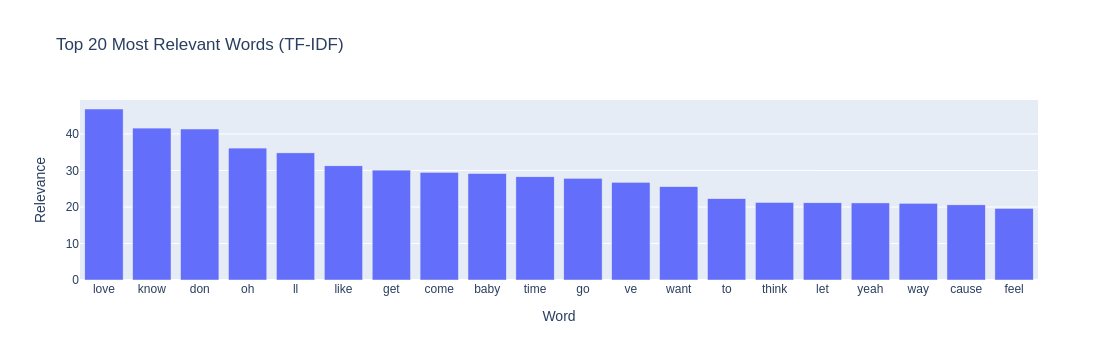

In [27]:
word_relevance = tfidf_df.sum().sort_values(ascending=False)

word_relevance_df = word_relevance.reset_index()
word_relevance_df.columns = ['word', 'relevance']

bar_word_relevance = px.bar(
    word_relevance_df.head(20),
    x='word',
    y='relevance',
    title='Top 20 Most Relevant Words (TF-IDF)',
    labels={'word': 'Word', 'relevance': 'Relevance'}
)

bar_word_relevance.show()

In [28]:
tfidf_df['category'] = labels

not_tfidf = tfidf_df[tfidf_df['category'] == 0].drop('category', axis=1)
yes_tfidf = tfidf_df[tfidf_df['category'] == 1].drop('category', axis=1)

In [29]:
top_relevant_not_words = not_tfidf.sum().sort_values(ascending = False).head(20)
top_relevant_yes_words = yes_tfidf.sum().sort_values(ascending = False).head(20)

In [30]:
max_value = max(top_relevant_not_words.max(), top_relevant_yes_words.max()) * 1.10

fig_ham = px.bar(
    x = top_relevant_not_words.index,
    y = top_relevant_not_words.values,
    title = 'Top 10 Most Relevant Words - Not Taylor',
    labels = {'x': 'Word', 'y': 'TF-IDF'},
    color_discrete_sequence=['green']
)

fig_ham.update_layout(
    xaxis_tickangle = 45,
    yaxis_range = [0, max_value]
)

# Gráfico para SPAM
fig_spam = px.bar(
    x = top_relevant_yes_words.index,
    y = top_relevant_yes_words.values,
    title = 'Top 10 Most Relevant Words - Taylor',
    labels = {'x': 'Word', 'y': 'TF-IDF'},
    color_discrete_sequence = ['red']
)

fig_spam.update_layout(
    xaxis_tickangle = 45,
    yaxis_range = [0, max_value]
)

fig_ham.show()
fig_spam.show()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, df['class'], test_size=0.2, random_state=42, stratify=df['class']
)

# Classifiers to test
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(random_state=42)
}

# Train and evaluate
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {'classifier': clf, 'accuracy': accuracy}
    print(f"{name}: {accuracy:.4f}")

# Find best classifier
best_name = max(results, key=lambda x: results[x]['accuracy'])
print(f"\nBest: {best_name} ({results[best_name]['accuracy']:.4f})")

Random Forest: 0.7900
SVM: 0.8450
Naive Bayes: 0.7700
Logistic Regression: 0.8050

Best: SVM (0.8450)
